# importing libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-pastel")
sns.set_theme(color_codes=True)
sns.set_theme(palette="dark",style="dark" )

In [3]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()

x = iris["data"][:, 2:]
y = iris["target"]

In [4]:
tree_clf = DecisionTreeClassifier(max_depth=2)
tree_clf.fit(x,y)

DecisionTreeClassifier(max_depth=2)

In [5]:
from sklearn.tree import export_graphviz

dot_data =export_graphviz(
    tree_clf,
    out_file="iris_tree.dot",
    feature_names=iris.feature_names[2:],
    class_names=iris.target_names,
    rounded=True,
    filled=True
)

In [6]:
import graphviz
graph = graphviz.Source(dot_data, format="png") 


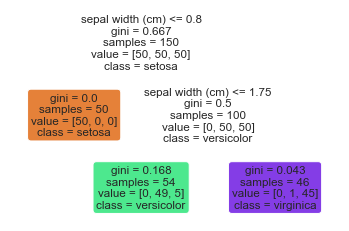

In [11]:
from sklearn import tree
fig = plt.gcf()
tree_fig = tree.plot_tree(tree_clf, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True, rounded=True, );
fig.savefig("iris_tree_2.png")

# exercise question

train and fine-tune a DT for the moons dataset

In [52]:
from sklearn.datasets import make_moons
x, y = make_moons(n_samples=10000, noise = 0.4)

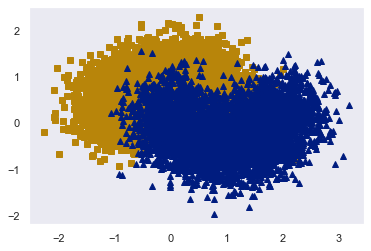

In [53]:
plt.plot(x[:,0][y==0], x[:,1][y==0], "ys")
plt.plot(x[:,0][y==1], x[:,1][y==1], "b^")
plt.grid(False, which='both')


In [54]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42)

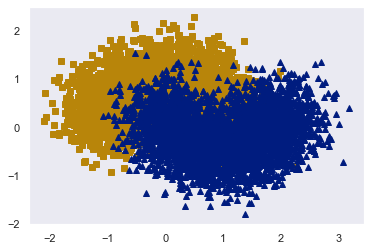

In [62]:
plt.plot(x_train[:,0][y_train==0], x_train[:,1][y_train==0], "ys")
plt.plot(x_train[:,0][y_train==1], x_train[:,1][y_train==1], "b^")


In [55]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

parameters = [
    {"max_depth":[3,5,7], "max_leaf_nodes":[2,4,6,10], "min_samples_leaf":[2,4,6,8]}
]

tree_clf = DecisionTreeClassifier()

grid_search = GridSearchCV(tree_clf,
                          parameters,
                          cv=5,
                          return_train_score=True,
                          )

In [56]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [3, 5, 7],
                          'max_leaf_nodes': [2, 4, 6, 10],
                          'min_samples_leaf': [2, 4, 6, 8]}],
             return_train_score=True)

In [57]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=7, max_leaf_nodes=10, min_samples_leaf=2)

In [58]:
parameters = [
    {"max_depth":[6,7,8], "max_leaf_nodes":[10,20,35], "min_samples_leaf":[2,3]}
]


grid_search_2 = GridSearchCV(tree_clf,
                          parameters,
                          cv=5,
                          return_train_score=True,
                          )

In [59]:
grid_search_2.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'max_depth': [6, 7, 8],
                          'max_leaf_nodes': [10, 20, 35],
                          'min_samples_leaf': [2, 3]}],
             return_train_score=True)

In [60]:
grid_search_2.best_estimator_

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_leaf=2)

In [63]:
tree_clf = DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_leaf=2)

In [64]:
tree_clf.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=10, min_samples_leaf=2)

In [67]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

cross_val_score(tree_clf, x_train,y_train, cv=3, scoring="accuracy")

array([0.8568, 0.8608, 0.8632])

In [71]:
#training on full dataset with HP tuned
tree_clf.fit(x,y)

cross_val_score(tree_clf,x,y, cv=3)

array([0.85542891, 0.85868587, 0.8589859 ])